# NUMPY

# Table des matières
**[Chapitre 0 - Introduction](#M0)**  


**[Chapitre 1 - Création de tableaux numpy](#M1)**  
- [1. A partir de listes](#M11)  
- [2. A partir de fonctions dédiées](#M12)  
- [Exercice 1](#M13) 
- [3. A partir de fichiers](#M14) 
- [4. A partir d'un tableau](#M15) 

**[Chapitre 2 - Les attributs dimensionnels](#M2)**.   
- [1. L'attribut shape](#M21)  
- [2. L'attribut ndim](#M22)  
- [3. L'attribut size](#M23)  
- [4. L'attribut reshape](#M24)
- [5. Méthode ravel](#M25) 

**[Chapitre 3 - Vectorisation](#M3)**  
- [1. Le paramètre out](#M31) 
- [2. La méthode at](#M32)  
- [3. Tableaux constants](#M33)
- [4. Méthode indice](#M34)

**[Chapitre 4 - Slicing](#M4)**  
- [Exercice 2](#M41) 
- [1. Quelques éléments](#M42)  
- [2. Le symbole spécial np.newaxis](#M43)
- [3. Différences avec les listes](#M44)

**[Chapitre 5 - Complexité](#M5)**
- [1. Tri par fusion](#M51)
- [2. Avec la méthode sort de Numpy](#M52)

## <font color=#3876C2> Chapitre 0 - Introduction</font> <a name="M0"></a>

NumPy est une librairie utilisée dans presque tous les projets de calcul numérique sous Python

NumPy fournit des structures de données performantes pour la manipulation de vecteurs, de matrices, de tenseurs. On parlera de tableau ou array en Anglais (en fait techniquement, ndarray, pour n-dimension array)

NumPy est écrit en C et en Fortran d'où ses performances élevées lorsque les calculs sont vectorisés (formulés comme des opérations sur des tableaux)

Pour utiliser NumPy il faut commencer par l'importer :

In [7]:
import numpy as np

## <font color=#3876C2> Chapitre 1 - Création de tableaux numpy</font> <a name="M1"></a>

Plusieurs possibilités:

1.  à partir de listes ou n-uplets Python
2.  en utilisant des fonctions dédiées, telles que arange, linspace, etc.
3.  par chargement à partir de fichiers
4.  à partir d'un tableau


### <font color=#FEB229> 1. A partir de listes</font> <a name="M11"></a>

Au moyen de la fonction np.array :

In [2]:
# un vecteur à partir d'une liste Python
v = np.array([1, 3, 2, 4])
print(v)
print(type(v))

[1 3 2 4]
<class 'numpy.ndarray'>


**Attention** : une erreur commune au début consiste à faire ceci, qui ne marche pas :

In [3]:
try:
    array = np.array(1, 2, 3, 4)
except Exception as e:
    print(f"OOPS, {type(e)}, {e}")

OOPS, <class 'ValueError'>, only 2 non-keyword arguments accepted


Tableau de dimension 2 (matrice):

In [4]:
# une matrice: l'argument est une liste emboitée
M = np.array([[1, 3], [2, 4]])
M

array([[1, 3],
       [2, 4]])

In [5]:
# accéder à un élément
print(M[0, 0])
print(M[1, 1])

1
4


In [6]:
# accéder à une ligne
print(M[0])
print(M[1])

[1 3]
[2 4]


In [7]:
# accéder à une colonne
print(M[:,0])
print(M[:,1])

[1 2]
[3 4]


La variable M est aussi du type ndarray

In [8]:
type(M)

numpy.ndarray

### <font color=#FEB229>2. A partir de fonctions dédiées</font> <a name="M12"></a>

mais aussi à partir d'un itérable

In [9]:
builtin_range = np.array(range(10))
builtin_range

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Sauf que dans ce cas précis on préfèrera utiliser directement la méthode arange de numpy :

In [10]:
numpy_range = np.arange(10)
numpy_range

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Avec l'avantage qu'avec cette méthode on peut donner des bornes et un pas d'incrément qui ne sont pas entiers :

In [11]:
numpy_range_f = np.arange(1.0, 2.0, 0.1)
numpy_range_f

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9])

## <font color='blue'>Exercice 1</font><a name="M13"></a>

In [12]:
# chargement de l'exercice
from corrections.exo_npmodif import exo_npmodif

On va écrire une fonction qui va créer une arange(n) et transformer
    en leurs opposés les termes d'indices compris entre a et b.
    La fonction retourne le tableau np modifié

In [13]:
exo_npmodif.example()

Appel,Résultat Attendu
"npmodif(10, 3, 5)","[ 0, 1, 2, 3, -4, -5, 6, 7, 8, 9]"


In [14]:
# Ecrivez votre fonction
def npmodif(n, a, b) :
    '''Ecrire votre fonction ici'''
    Z = np.arange(n)
    Z[(a < Z) & (Z <= b)] *= -1
    return list(Z)


In [15]:
%timeit npmodif(10,3,5)

13.7 µs ± 317 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
# pour vérifier votre code
exo_npmodif.correction(npmodif)

Appel,Attendu,Obtenu,
"npmodif(10, 3, 5)","[ 0, 1, 2, 3, -4, -5, 6, 7, 8, 9]","[ 0, 1, 2, 3, -4, -5, 6, 7, 8, 9]",OK
"npmodif(10, 2, 8)","[ 0, 1, 2, -3, -4, -5, -6, -7, -8, 9]","[ 0, 1, 2, -3, -4, -5, -6, -7, -8, 9]",OK
"npmodif(5, 1, 3)","[0, 1, -2, -3, 4]","[0, 1, -2, -3, 4]",OK
"npmodif(15, 10, 14)","[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -11, -12, -13, -14]","[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -11, -12, -13, -14]",OK


**np.linspace**

Aussi et surtout, lorsqu'on veut créer un intervalle dont on connaît les bornes, il est souvent plus facile d'utiliser linspace, qui crée un intervalle un peu comme arange, mais on lui précise un nombre de points plutôt qu'un pas :

In [17]:
X = np.linspace(0., 10., 50)
X

array([  0.        ,   0.20408163,   0.40816327,   0.6122449 ,
         0.81632653,   1.02040816,   1.2244898 ,   1.42857143,
         1.63265306,   1.83673469,   2.04081633,   2.24489796,
         2.44897959,   2.65306122,   2.85714286,   3.06122449,
         3.26530612,   3.46938776,   3.67346939,   3.87755102,
         4.08163265,   4.28571429,   4.48979592,   4.69387755,
         4.89795918,   5.10204082,   5.30612245,   5.51020408,
         5.71428571,   5.91836735,   6.12244898,   6.32653061,
         6.53061224,   6.73469388,   6.93877551,   7.14285714,
         7.34693878,   7.55102041,   7.75510204,   7.95918367,
         8.16326531,   8.36734694,   8.57142857,   8.7755102 ,
         8.97959184,   9.18367347,   9.3877551 ,   9.59183673,
         9.79591837,  10.        ])

Vous remarquez que les 50 points couvrent à intervalles réguliers l'espace compris entre 0 et 10 inclusivement. Notons que 50 est aussi le nombre de points par défaut. Cette fonction est très utilisée lorsqu'on veut dessiner une fonction entre deux bornes.

### <font color=#FEB229> 3. A partir de fichiers</font> <a name="M14"></a>

Par exemple à partir d'une image (voir activité 1)

### <font color=#FEB229> 4. A partir d'un tableau</font> <a name="M15"></a>

In [18]:
w = 2*v
print(w)

[2 6 4 8]


In [19]:
z = w**2
print(z)

[ 4 36 16 64]


## <font color=#3876C2> Chapitre 2 - Les attributs dimensionnels</font> <a name="M2"></a>

### <font color=#FEB229> 1. L'attribut shape</font> <a name="M21"></a>

v et M diffèrent par leur taille:

In [20]:
v.shape

(4,)

In [21]:
M.shape

(2, 2)

In [22]:
type(M.shape)

tuple

### <font color=#FEB229> 2. L'attribut ndim</font> <a name="M22"></a>

il permet de savoir quel est la dimension d'un ndarray

In [23]:
N = np.array([[1, 3], [2, 4], [2, 4]])
print(v.ndim)
print(M.ndim)
print(N.ndim)

1
2
2


### <font color=#FEB229> 3. L'attribut size</font> <a name="M23"></a>

il permet de savoir quel est le nombre d'éléments dans un ndarray

In [24]:
print(v.size)
print(M.size)
print(N.size)

4
4
6


### <font color=#FEB229> 4. L'attribut reshape</font> <a name="M24"></a>

In [25]:
d2 = np.array([[11, 12, 13], [21, 22, 23]])
d2

array([[11, 12, 13],
       [21, 22, 23]])

In [26]:
# la forme (les dimensions) du tableau
d2.shape

(2, 3)

In [27]:
# l'argument qu'on passe à reshape est le tuple
# qui décrit la nouvelle *shape*
v2 = d2.reshape((3, 2))
v2

array([[11, 12],
       [13, 21],
       [22, 23]])

In [28]:
# on change un tableau
d2[0][0] = 100
d2

array([[100,  12,  13],
       [ 21,  22,  23]])

In [29]:
# ça se répercute dans l'autre
v2

array([[100,  12],
       [ 13,  21],
       [ 22,  23]])

**Exemple d'un tableau à 3 dimensions**

In [30]:
T = np.array([[[1, 3, 2, 4]]])
print(T)

[[[1 3 2 4]]]


In [31]:
print(T.shape)
print(T.ndim)
print(T.size)
np.size(T)

(1, 1, 4)
3
4


4

### Résumé des attributs

Voici un résumé des attributs des tableaux `numpy` :

| *attribut* | *signification*               | *exemple*    |
|:-----------|:------------------------------|:-------------|
| `shape`    | tuple des dimensions          | `(3, 5, 7)`  |
| `ndim`     | nombre dimensions             | `3`          |
| `size`     | nombre d'éléments             | `3 * 5 * 7`  |
| `dtype`    | type de chaque élément        | `np.float64` |
| `itemsize` | taille en octets d'un élément | `8`          |

### <font color=#FEB229> 5. Méthode ravel</font> <a name="M25"></a>

#### Méthode `ravel` qui  permet d'aplatir n'importe quel tableau :

In [32]:
d2.ravel()

array([100,  12,  13,  21,  22,  23])

## <font color=#3876C2> Chapitre 3 - Vectorisation</font> <a name="M3"></a>

Exploitation du fait que les tableaux Numpy sont stockés dans des zones contigües de mémoire et que tous les éléments stockés ont la même dimension. Il est par conséquent extrêmement efficace de parcourir les différents éléments d'un tableau Numpy

In [33]:
a = np.arange(1000)

In [34]:
%timeit [x**2 + 2*x - 1 for x in a]

734 µs ± 3.84 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
%timeit a**2 + 2*a - 1

8.97 µs ± 76.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### <font color=#FEB229> 1. Le paramètre out</font> <a name="M31"></a>

Tous les opérateurs (+, *, ** ...) sont factorisés dans Numpy ainsi que certaines fonctions (sqrt...)

Certaines fonctions accueillent des paramètres permettant d'améliorer encore les performances tel out qui permet de spécifier dans quel objet on va écrire le résultat. Par défaut les fonctions vectorisées créent un nouvel objet. L'intérêt est donc d'utiliser un objet existant pour économiser le temps de création de cet objet et avoir un gain important en terme de mémoire.

In [36]:
a = np.arange(1, 1_000_000, dtype=np.float64)

"-r 1 -n 1" signifie qu'on ne fait qu'une seule fois l'opération'

In [37]:
%timeit -r 1 -n 1 np.sqrt(a)

7.74 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [38]:
%timeit -r 1 -n 1 np.sqrt(a, out = a)

2.41 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### <font color=#FEB229> 2. La méthode at</font> <a name="M32"></a>

Certaines fonctions vectorisées possédent la méthode at qui permet d'appliquer cette fonction à une seule partie d'un ndarray

In [39]:
a

array([   1.        ,    1.41421356,    1.73205081, ...,  999.9985    ,
        999.999     ,  999.9995    ])

In [40]:
a[:5]

array([ 1.        ,  1.41421356,  1.73205081,  2.        ,  2.23606798])

In [41]:
np.log.at(a, [2, 4])

In [42]:
a[:5]

array([ 1.        ,  1.41421356,  0.54930614,  2.        ,  0.80471896])

### <font color=#FEB229> 3. Tableaux constants</font> <a name="M33"></a>

On peut aussi créer et initialiser un tableau avec `np.zeros` et `np.ones` :

In [43]:
zeros = np.zeros(dtype=np.complex128, shape=(1000, 100))
print(zeros)

[[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 ..., 
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]]


In [44]:
fours = 4 * np.ones(dtype=float, shape=(8, 8))
fours

array([[ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.]])

### <font color=#FEB229> 4. Méthode indice</font> <a name="M34"></a>

In [45]:
ix, iy = np.indices((3, 5))

In [46]:
ix

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

In [47]:
iy

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

Si on veut construire un tableau de taille (2, 4) dans lequel, par exemple :
```Python
tab[i, j] = 200*i + 2*j + 50
```
On n'a qu'à faire :

In [48]:
ix, iy = np.indices((2, 4))
tab = 200*ix + 2*iy + 50
tab

array([[ 50,  52,  54,  56],
       [250, 252, 254, 256]])

## <font color=#3876C2> Chapitre 4 - Slicing</font> <a name="M4"></a>

## <font color='blue'>Exercice 2</font><a name="M41"></a>

#### En utilisant la méthode `indices` écrire une fonction `creerarray` qui retourne le ndarray suivant lors de l'instruction `creerarray(5)`

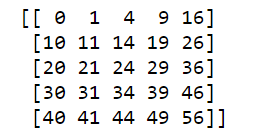

In [49]:
# chargement de l'exercice
from corrections.exo_creerarray import exo_creerarray

In [50]:
exo_creerarray.example()

Appel,Résultat Attendu
creerarray(5),56


In [51]:
# Ecrivez votre fonction

'''def creerarray(n):
    i = np.arange(n)
    j = i.reshape((n, 1))
    return i**2 + 10 * j'''

def creerarray(n):
    ix, iy = np.indices((n, n))
    tab = ix**2 + 10 * iy
    return tab[n-1,n-1]


In [52]:
%timeit creerarray(5)

19.7 µs ± 99.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [53]:
# pour vérifier votre code
exo_creerarray.correction(creerarray)

Appel,Attendu,Obtenu,
creerarray(5),56,56,OK
creerarray(6),75,75,OK
creerarray(7),96,96,OK
creerarray(8),119,119,OK


In [54]:
def creerarray(n):
    ix, iy = np.indices((n, n))
    tab = ix**2 + 10 * iy
    return tab

In [55]:
a5 = creerarray(5)
print(a5)

[[ 0 10 20 30 40]
 [ 1 11 21 31 41]
 [ 4 14 24 34 44]
 [ 9 19 29 39 49]
 [16 26 36 46 56]]


### <font color=#FEB229> 1. Quelques éléments</font> <a name="M42"></a>

In [56]:
# Rappel : grâce au slicing on peut référencer une colonne :

a5[:, 3]

# C'est un tableau à une dimension, mais vous pouvez tout de même modifier la colonne par une affectation :

a5[:, 3] = range(300, 305)
print(a5)

[[  0  10  20 300  40]
 [  1  11  21 301  41]
 [  4  14  24 302  44]
 [  9  19  29 303  49]
 [ 16  26  36 304  56]]


Ou par broadcasting (Le broadcasting est une fonctionnalité de numpy qui permet de réaliser des opérations entre des tableaux de dimensions différentes tant qu’une consistence existe entre ces tableaux).

On affecte un scalaire à une colonne :

In [57]:
a5[:, 2] = 200
print(a5)

[[  0  10 200 300  40]
 [  1  11 200 301  41]
 [  4  14 200 302  44]
 [  9  19 200 303  49]
 [ 16  26 200 304  56]]


In [58]:
# ou on ajoute un scalaire à une colonne
a5[:, 4] += 400
print(a5)

[[  0  10 200 300 440]
 [  1  11 200 301 441]
 [  4  14 200 302 444]
 [  9  19 200 303 449]
 [ 16  26 200 304 456]]


In [59]:
# Les slices peuvent prendre une forme générale :

a8 = creerarray(8)
print(a8)

# toutes les lignes de rang 1, 4, 7
a8[1::3]

[[  0  10  20  30  40  50  60  70]
 [  1  11  21  31  41  51  61  71]
 [  4  14  24  34  44  54  64  74]
 [  9  19  29  39  49  59  69  79]
 [ 16  26  36  46  56  66  76  86]
 [ 25  35  45  55  65  75  85  95]
 [ 36  46  56  66  76  86  96 106]
 [ 49  59  69  79  89  99 109 119]]


array([[  1,  11,  21,  31,  41,  51,  61,  71],
       [ 16,  26,  36,  46,  56,  66,  76,  86],
       [ 49,  59,  69,  79,  89,  99, 109, 119]])

In [60]:
# toutes les colonnes de rang 1, 5
a8[:, 1::4]

array([[10, 50],
       [11, 51],
       [14, 54],
       [19, 59],
       [26, 66],
       [35, 75],
       [46, 86],
       [59, 99]])

In [61]:
# et on peut bien sûr les modifier
a8[:, 1::4] = 0
print(a8)

[[  0   0  20  30  40   0  60  70]
 [  1   0  21  31  41   0  61  71]
 [  4   0  24  34  44   0  64  74]
 [  9   0  29  39  49   0  69  79]
 [ 16   0  36  46  56   0  76  86]
 [ 25   0  45  55  65   0  85  95]
 [ 36   0  56  66  76   0  96 106]
 [ 49   0  69  79  89   0 109 119]]


In [62]:
# Du coup, le slicing peut servir à extraire des blocs :

# un bloc au hasard dans a8
print(a8[5:8, 2:5])

[[45 55 65]
 [56 66 76]
 [69 79 89]]


### <font color=#FEB229> 2. Le symbole spécial np.newaxis</font> <a name="M43"></a>

#### Mais auparavant les axes `axis`

In [63]:
a = np.arange(1, 10).reshape(3, 3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [64]:
np.sum(a)

45

In [65]:
np.sum(a, axis = 0)

array([12, 15, 18])

In [66]:
np.sum(a, axis = 1)

array([ 6, 15, 24])

In [67]:
print(a.ndim)

2


In [68]:
# np.sum(a, axis = 2)

In [69]:
# On peut utiliser également le symbole spécial `np.newaxis` en conjonction avec un slice pour "décaler" les dimensions :

X = np.arange(1, 7)
print(X)

[1 2 3 4 5 6]


In [70]:
X.shape

(6,)

In [71]:
print(X.ndim)

1


In [72]:
Y = X[:, np.newaxis]
print(Y)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [73]:
print(Y.shape)
print(Y.ndim)

(6, 1)
2


In [74]:
# Et ainsi de suite :

Z = Y[:, np.newaxis]
Z

array([[[1]],

       [[2]],

       [[3]],

       [[4]],

       [[5]],

       [[6]]])

In [75]:
print(Z.shape)
print(Z.ndim)

(6, 1, 1)
3


In [76]:
# De cette façon, par exemple, en combinant le slicing pour créer X et Y,
# et le broadcasting pour créer leur somme,  on peut créer facilement la table de tous les tirages de 2 dés à 6 faces :

dice2 = X + Y
print(dice2)

[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]


In [77]:
# Ou tous les tirages à trois dés :

dice3 = X + Y + Z
print(dice3)

[[[ 3  4  5  6  7  8]
  [ 4  5  6  7  8  9]
  [ 5  6  7  8  9 10]
  [ 6  7  8  9 10 11]
  [ 7  8  9 10 11 12]
  [ 8  9 10 11 12 13]]

 [[ 4  5  6  7  8  9]
  [ 5  6  7  8  9 10]
  [ 6  7  8  9 10 11]
  [ 7  8  9 10 11 12]
  [ 8  9 10 11 12 13]
  [ 9 10 11 12 13 14]]

 [[ 5  6  7  8  9 10]
  [ 6  7  8  9 10 11]
  [ 7  8  9 10 11 12]
  [ 8  9 10 11 12 13]
  [ 9 10 11 12 13 14]
  [10 11 12 13 14 15]]

 [[ 6  7  8  9 10 11]
  [ 7  8  9 10 11 12]
  [ 8  9 10 11 12 13]
  [ 9 10 11 12 13 14]
  [10 11 12 13 14 15]
  [11 12 13 14 15 16]]

 [[ 7  8  9 10 11 12]
  [ 8  9 10 11 12 13]
  [ 9 10 11 12 13 14]
  [10 11 12 13 14 15]
  [11 12 13 14 15 16]
  [12 13 14 15 16 17]]

 [[ 8  9 10 11 12 13]
  [ 9 10 11 12 13 14]
  [10 11 12 13 14 15]
  [11 12 13 14 15 16]
  [12 13 14 15 16 17]
  [13 14 15 16 17 18]]]


In [78]:
# utilitaire qui n'a rien à voir, mais avec `np.unique`, vous pourriez calculer le nombre d'occurrences dans le tableau,
# et ainsi calculer les probabilités d'apparition de tous les nombres entre 3 et 18 :

effectifs = np.unique(dice3, return_counts=True)
effectifs

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
 array([ 1,  3,  6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10,  6,  3,  1], dtype=int64))

In [79]:
effectifs[1]/np.sum(effectifs[1])

array([ 0.00462963,  0.01388889,  0.02777778,  0.0462963 ,  0.06944444,
        0.09722222,  0.11574074,  0.125     ,  0.125     ,  0.11574074,
        0.09722222,  0.06944444,  0.0462963 ,  0.02777778,  0.01388889,
        0.00462963])

### <font color=#FEB229> 3. Différences avec les listes</font> <a name="M44"></a>

#### Avec l'indexation et le slicing, on peut créer des tableaux qui sont des vues sur des fragments d'un tableau ; on peut également déformer leur dimension grâce à `newaxis` ; on peut modifier ces fragments, en utilisant un scalaire, un tableau, ou un slice sur un autre tableau. Les possibilités sont infinies.

#### Il est cependant utile de souligner quelques différences entre les tableaux `numpy` et, les listes natives, pour ce qui concerne les indexations et le *slicing*.

#### On ne peut pas changer la taille d'un tableau avec le slicing.

#### La taille d'un objet `numpy` est par définition constante ; cela signifie qu'on ne peut pas, par exemple, modifier sa taille totale avec du slicing. 



## <font color=#3876C2> Chapitre 5 - Complexité</font> <a name="M5"></a>

https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html

Comparons les performances de tri de tableau

### <font color=#FEB229> 1. Tri par fusion</font> <a name="M51"></a>

In [1]:
def triFusion(T, i, j) :
    if i < j :
        m = (i + j) // 2
        T1 = triFusion(T, i, m)
        T2 = triFusion(T, m + 1, j)
        return fusion(T1, T2)
    else :
        return T[i:i+1]


In [2]:
def fusion(T1, T2) :
    i = 0
    j = 0
    T = []
    while i < len(T1) and j < len(T2) :
        if T1[i] < T2[j] :
            T.append(T1[i])
            i += 1
        else:
            T.append(T2[j])
            j += 1
    while i < len(T1) :
        T.append(T1[i])
        i += 1
    while j < len(T2) :
        T.append(T2[j])
        j += 1           
    return T

In [14]:
print(triFusion([1, 5, 7, 2, 4, 3, 9, 8],0 ,7))

[1, 2, 3, 4, 5, 7, 8, 9]


In [3]:
%timeit triFusion([1, 5, 7, 2, 4, 3, 9, 8],0 ,7)

15.1 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


 ### <font color=#FEB229> 2. Avec la méthode sort de Numpy</font> <a name="M52"></a>

In [8]:
a = np.array([1, 5, 7, 2, 4, 3, 9, 8])

In [9]:
np.sort(a)

array([1, 2, 3, 4, 5, 7, 8, 9])

In [10]:
%timeit np.sort(a)

3.63 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%timeit np.sort(a,kind='quicksort')

3.49 µs ± 63.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit np.sort(a,kind='mergesort')

3.62 µs ± 83.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
%timeit np.sort(a,kind='heapsort')

3.43 µs ± 43.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
